# Object Recognition using YOLOv8

## Initial Setup

1. Open Notebook secrets and add ```ROBOFLOW_API_KEY```
2. Then Run each cell.

In [2]:
# Install YOLOv8 (Ultralytics)
%pip install ultralytics
%pip install roboflow

# Import libraries and check for GPU
import ultralytics
from ultralytics import YOLO
import torch

# Display setup info
ultralytics.checks()

# verify GPU availability
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Ultralytics 8.4.1 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.9/112.6 GB disk)
Setup complete. Using torch 2.9.0+cu126 (Tesla T4)


## Download Dataset

In [3]:
# Create a directory for the data
!mkdir datasets
%cd datasets

from google.colab import userdata
API_KEY = userdata.get("ROBOFLOW_API_KEY")


from roboflow import Roboflow
rf = Roboflow(api_key=API_KEY)
project = rf.workspace("joseph-nelson").project("hard-hat-workers")
version = project.version(2)
dataset = version.download("yolov8")
print("\nRoboflow connected.")


# Return to home directory
%cd /content

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Hard-Hat-Workers-2 in yolov8:: 100%|██████████| 14079/14079 [00:01<00:00, 8895.81it/s] 



Roboflow connected.
/content


## Training the Model

In [8]:
!yolo detect train model=yolov8n.pt data=/content/datasets/Hard-Hat-Workers-2/data.yaml epochs=30 imgsz=640 plots=True

Ultralytics 8.4.1 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/Hard-Hat-Workers-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspecti

## Validate result (Evaluation)

In [9]:
!yolo detect val model=/content/runs/detect/train2/weights/best.pt data=/content/datasets/Hard-Hat-Workers-2/data.yaml classes=[0,1]

Ultralytics 8.4.1 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 73 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1448.0±681.5 MB/s, size: 30.0 KB)
val: Scanning /content/datasets/Hard-Hat-Workers-2/test/labels.cache... 1766 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1766/1766 435.7Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 111/111 7.8it/s 14.2s
                   all       1766       6666      0.947      0.941      0.976      0.679
                  head        339       1803      0.934      0.936       0.97      0.675
                helmet       1604       4863      0.961      0.946      0.982      0.683
Speed: 0.7ms preprocess, 2.7ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /content/runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Visual Proof

Testing on: /content/datasets/Hard-Hat-Workers-2/test/images/006874_jpg.rf.902c42e9427430c1a048b28049e03c61.jpg
Ultralytics 8.4.1 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 73 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/datasets/Hard-Hat-Workers-2/test/images/006874_jpg.rf.902c42e9427430c1a048b28049e03c61.jpg: 416x640 5 helmets, 56.9ms
Speed: 3.5ms preprocess, 56.9ms inference, 16.9ms postprocess per image at shape (1, 3, 416, 640)
Results saved to /content/runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


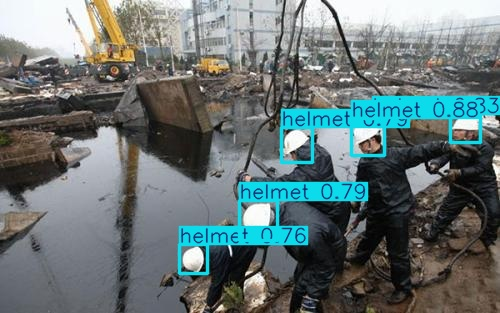

In [10]:
import os
import glob
import random
from IPython.display import Image, display

# Find a random image from the test set
test_images = glob.glob('/content/datasets/Hard-Hat-Workers-2/test/images/*.jpg')
random_image = random.choice(test_images)

print(f"Testing on: {random_image}")

# Run inference
!yolo detect predict model=/content/runs/detect/train2/weights/best.pt source="{random_image}" save=True

# Display result
# Results are saved in runs/detect/predict/
predict_dirs = glob.glob('/content/runs/detect/predict*/')
latest_dir = max(predict_dirs, key=os.path.getmtime)
result_image = f"{latest_dir}/{os.path.basename(random_image)}"

display(Image(filename=result_image, width=600))